##### Authors: Rafael Dousse, Eva Ray, Massimo Stefani

## Exercise 1 - Bayes classification system

In [2]:
# Import some useful libraries

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

## 1a. Getting started with Bayes

a) Read the training data from file ex1-data-train.csv. The first two columns are x1 and x2. The last column holds the class label y.

In [3]:
def read_data(file):
    dataset = pd.read_csv(file, names=['x1','x2','y'])
    print(dataset.head())
    return dataset[["x1", "x2"]], dataset["y"].values

In [4]:
X_train, y_train = read_data("ex1-data-train.csv")

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


In [5]:
# Prepare a function to compute accuracy
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.size

b) Compute the priors of both classes P(C0) and P(C1)

In [6]:
# TODO: Compute the priors
prior_c0 = y_train[y_train == 0].size / y_train.size
prior_c1 = y_train[y_train == 1].size / y_train.size
print(f"P(C0) = {prior_c0}, P(C1) = {prior_c1}")

P(C0) = 0.4, P(C1) = 0.6


c) Compute histograms of x1 and x2 for each class (total of 4 histograms). Plot these histograms. Advice : use the numpy `histogram(a, bins="auto")` function.

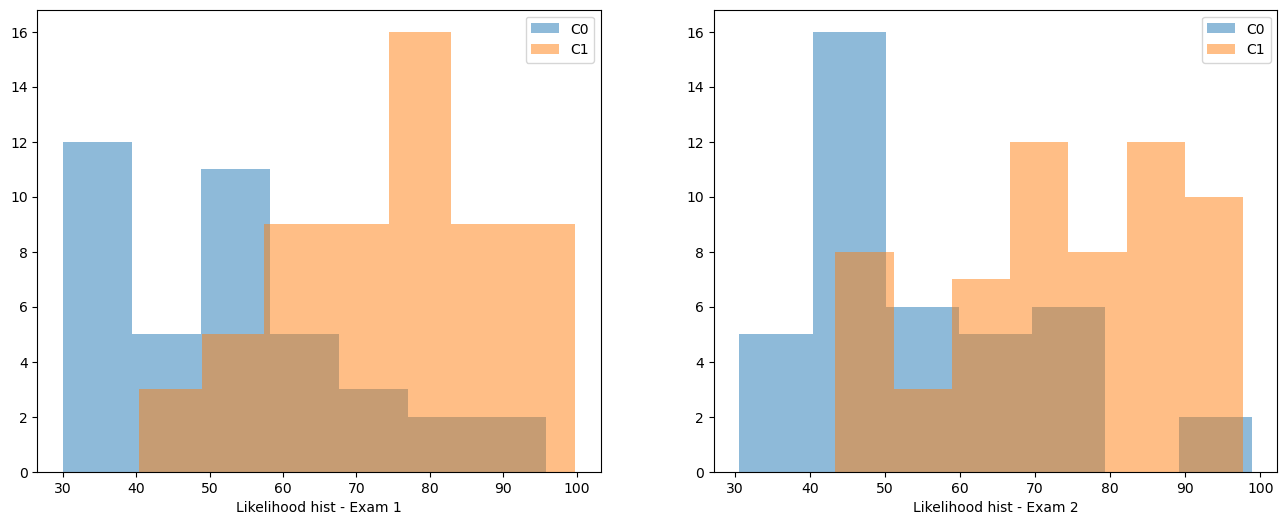

In [7]:
# Separate x1 and x2 by class
x1_class0 = X_train[y_train == 0]["x1"]
x1_class1 = X_train[y_train == 1]["x1"]

x2_class0 = X_train[y_train == 0]["x2"]
x2_class1 = X_train[y_train == 1]["x2"]

# TODO: Compute histograms
hist_x1_class0, bins_x1_c0 = np.histogram(x1_class0, bins="auto")
hist_x1_class1, bins_x1_c1 = np.histogram(x1_class1, bins="auto")

hist_x2_class0, bins_x2_c0 = np.histogram(x2_class0, bins="auto")
hist_x2_class1, bins_x2_c1 = np.histogram(x2_class1, bins="auto")

# TODO: plot histograms
plt.figure(figsize=(16,6))

# Exam 1 histograms
plt.subplot(1, 2, 1)
plt.hist(x1_class0, bins=bins_x1_c0, alpha=0.5, label="C0")
plt.hist(x1_class1, bins=bins_x1_c1, alpha=0.5, label="C1")
plt.xlabel('Likelihood hist - Exam 1')
plt.legend()

# Exam 2 histograms
plt.subplot(1, 2, 2)
plt.hist(x2_class0, bins=bins_x2_c0, alpha=0.5, label="C0")
plt.hist(x2_class1, bins=bins_x2_c1, alpha=0.5, label="C1")
plt.xlabel('Likelihood hist - Exam 2')
plt.legend()

plt.show()

d) Use the histograms to compute the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). For this define a function `likelihood_hist(x, hist_values, edge_values)` that returns the likelihood of x for a given histogram (defined by its values and bin edges as returned by the numpy `histogram()` function).

In [8]:
def likelihood_hist(x: float, hist_values: np.ndarray, bin_edges: np.ndarray) -> float:
    # TODO: compute likelihoods from histograms outputs

    # Find the bin index for x
    bin = np.digitize(x, bin_edges) - 1

    if bin < 0 or bin >= len(hist_values):
        return 0.0

    return hist_values[bin] / hist_values.sum()

e) Implement the classification decision according to Bayes rule and compute the overall accuracy of the system on the test set ex1-data-test.csv. :
- using only feature x1
- using only feature x2
- using x1 and x2 making the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck)

In [9]:
X_test, y_test = read_data("ex1-data-test.csv")

          x1         x2  y
0  39.196334  78.530294  0
1  40.448499  86.839470  1
2  65.571920  44.303497  0
3  79.648113  70.806564  1
4  66.260221  41.672703  0


In [10]:
# TODO: predict on test set in the 3 cases described above

# Using only x1

y_pred_x1 = []

for x in X_test["x1"]:
    likelihood_c0 = likelihood_hist(x, hist_x1_class0, bins_x1_c0) * prior_c0
    likelihood_c1 = likelihood_hist(x, hist_x1_class1, bins_x1_c1) * prior_c1

    if likelihood_c0 > likelihood_c1:
        y_pred_x1.append(0)
    else:
        y_pred_x1.append(1)

print(f"The accuracy using only x1 is: {accuracy_score(y_test, y_pred_x1)}")

The accuracy using only x1 is: 0.64


In [11]:
# Using only x2

y_pred_x2 = []

for x in X_test["x2"]:
    likelihood_c0 = likelihood_hist(x, hist_x2_class0, bins_x2_c0) * prior_c0
    likelihood_c1 = likelihood_hist(x, hist_x2_class1, bins_x2_c1) * prior_c1

    if likelihood_c0 > likelihood_c1:
        y_pred_x2.append(0)
    else:
        y_pred_x2.append(1)

print(f"The accuracy using only x2 is: {accuracy_score(y_test, y_pred_x2)}")

The accuracy using only x2 is: 0.72


In [12]:
# Using both x1 and x2

y_pred_x1_x2 = []

for x1, x2 in zip(X_test["x1"], X_test["x2"]):
    likelihood_c0 = (likelihood_hist(x1, hist_x1_class0, bins_x1_c0) *
                     likelihood_hist(x2, hist_x2_class0, bins_x2_c0) * prior_c0)
    likelihood_c1 = (likelihood_hist(x1, hist_x1_class1, bins_x1_c1) *
                     likelihood_hist(x2, hist_x2_class1, bins_x2_c1) * prior_c1)

    if likelihood_c0 > likelihood_c1:
        y_pred_x1_x2.append(0)
    else:
        y_pred_x1_x2.append(1)

print(f"The accuracy using x1 and x2 is: {accuracy_score(y_test, y_pred_x1_x2)}")

The accuracy using x1 and x2 is: 0.83


Which system is the best ?

We get the accuracies:

| Using only x1 | Using only x2 | Using x1 and x2 |
|---------------|---------------|-----------------|
| 0.64          | 0.72          | 0.83            |

Thus, the best system is the one using both features x1 and x2. It makes sense since we have more meaningful information to classify the samples.

## 1b. Bayes - Univariate Gaussian distribution

Do the same as in a) but this time using univariate Gaussian distribution to model the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). You may use the numpy functions `mean()` and `var()` to compute the mean μ and variance σ2 of the distribution. To model the likelihood of both features, you may also do the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck).


In [13]:
def likelihood_univariate_gaussian(x: float, mean: float, var: float) -> float:
    # TODO: compute likelihoods from histograms outputs

    return (1.0 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))

In [14]:
# TODO: Compute mean and variance for each classes and each features (8 values)

var_x1_class0 = np.var(x1_class0)
mean_x1_class0 = np.mean(x1_class0)

var_x1_class1 = np.var(x1_class1)
mean_x1_class1 = np.mean(x1_class1)

var_x2_class0 = np.var(x2_class0)
mean_x2_class0 = np.mean(x2_class0)

var_x2_class1 = np.var(x2_class1)
mean_x2_class1 = np.mean(x2_class1)


In [15]:
# TODO: predict on test set in the 3 cases
y_pred_x1 = []
y_pred_x2 = []
y_pred_both = []

for x1, x2 in zip(X_test["x1"], X_test["x2"]):
    # only x1
    likelihood_c0_x1 = likelihood_univariate_gaussian(x1, mean_x1_class0, var_x1_class0) * prior_c0
    likelihood_c1_x1 = likelihood_univariate_gaussian(x1, mean_x1_class1, var_x1_class1) * prior_c1
    y_pred_x1.append(0 if likelihood_c0_x1 > likelihood_c1_x1 else 1)

    # only x2
    likelihood_c0_x2 = likelihood_univariate_gaussian(x2, mean_x2_class0, var_x2_class0) * prior_c0
    likelihood_c1_x2 = likelihood_univariate_gaussian(x2, mean_x2_class1, var_x2_class1) * prior_c1
    y_pred_x2.append(0 if likelihood_c0_x2 > likelihood_c1_x2 else 1)

    # with x1 and x2 (naïve Bayes)
    likelihood_c0_both = (likelihood_univariate_gaussian(x1, mean_x1_class0, var_x1_class0) *
                          likelihood_univariate_gaussian(x2, mean_x2_class0, var_x2_class0) * prior_c0)
    likelihood_c1_both = (likelihood_univariate_gaussian(x1, mean_x1_class1, var_x1_class1) *
                          likelihood_univariate_gaussian(x2, mean_x2_class1, var_x2_class1) * prior_c1)
    y_pred_both.append(0 if likelihood_c0_both > likelihood_c1_both else 1)


# Accuracy 
acc_x1 = accuracy_score(y_test, y_pred_x1)
acc_x2 = accuracy_score(y_test, y_pred_x2)
acc_both = accuracy_score(y_test, y_pred_both)

print(f"Accuracy using x1 only: {acc_x1:.3f}")
print(f"Accuracy using x2 only: {acc_x2:.3f}")
print(f"Accuracy using both x1 and x2: {acc_both:.3f}")


Accuracy using x1 only: 0.710
Accuracy using x2 only: 0.720
Accuracy using both x1 and x2: 0.890
